In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [354]:
admissions = pd.read_csv("C:\\Users\\AMAN KUMAR  SINGH\\OneDrive\\Documents\\Unified Mentor\\Tobacco Use and Mortality  project 2\\data sets\\admissions.csv")

In [355]:
admissions.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [356]:
# Information about Dataset
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             2079 non-null   object
 1   ICD10 Code       2079 non-null   object
 2   ICD10 Diagnosis  2079 non-null   object
 3   Diagnosis Type   2079 non-null   object
 4   Metric           2079 non-null   object
 5   Sex              1386 non-null   object
 6   Value            2078 non-null   object
dtypes: object(7)
memory usage: 113.8+ KB


In [357]:
admissions.shape

(2079, 7)

In [358]:
admissions.columns

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex', 'Value'],
      dtype='object')

In [359]:
# Summary Statistics of Numerical Columns
admissions.describe()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2014/15,All codes,All admissions,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


In [360]:
# Check missing value
print(admissions.isnull().sum())

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64


In [361]:
admissions['Sex'] = admissions['Sex'].fillna("Unknown")
admissions['Value'] = admissions['Value'].fillna(0)

In [362]:
print(admissions.isnull().sum())

Year               0
ICD10 Code         0
ICD10 Diagnosis    0
Diagnosis Type     0
Metric             0
Sex                0
Value              0
dtype: int64


In [363]:
admissions['Sex']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
2074     Female
2075     Female
2076     Female
2077     Female
2078     Female
Name: Sex, Length: 2079, dtype: object

C:\Users\AMAN KUMAR  SINGH\AppData\Local\Temp\ipykernel_14068\2104840690.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=admissions, x='Year', y='Value', estimator='sum', ci=None)


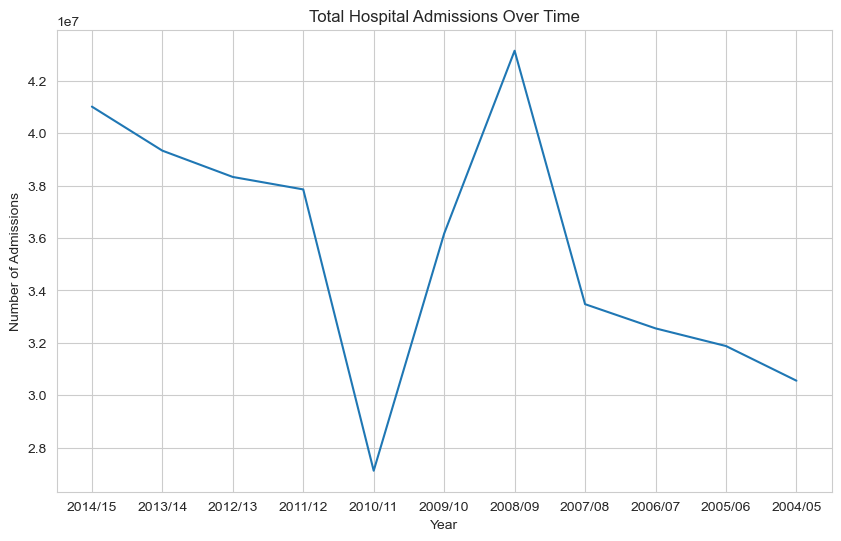

In [374]:
#Total Admissions Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=admissions, x='Year', y='Value', estimator='sum', ci=None)
plt.title('Total Hospital Admissions Over Time')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()


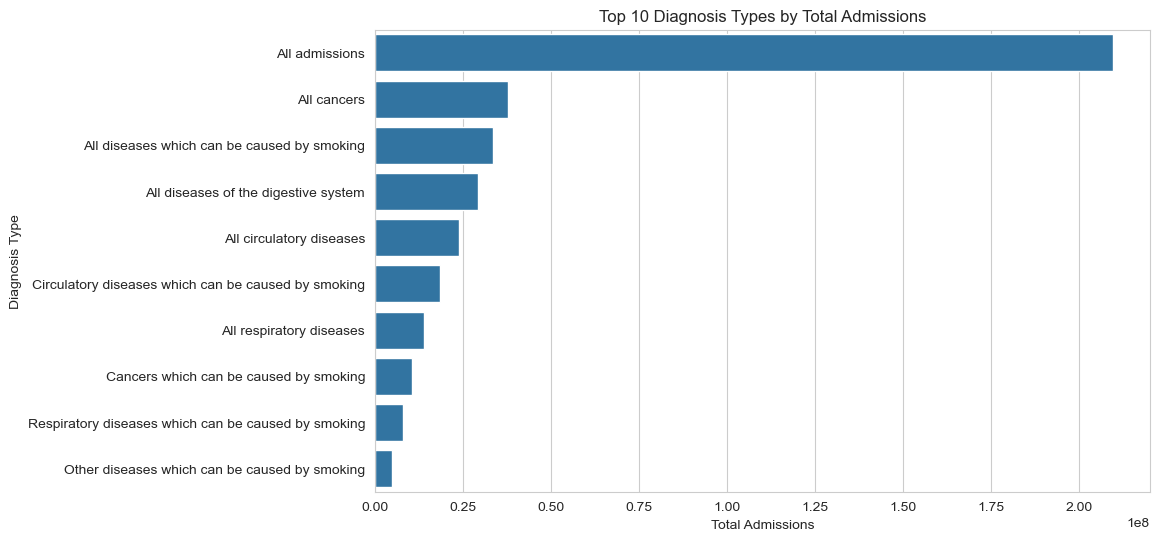

In [370]:
#Admissions by Diagnosis Type
top_diagnoses = admissions.groupby('Diagnosis Type')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_diagnoses.index, x=top_diagnoses.values)
plt.title('Top 10 Diagnosis Types by Total Admissions')
plt.xlabel('Total Admissions')
plt.ylabel('Diagnosis Type')
plt.show()


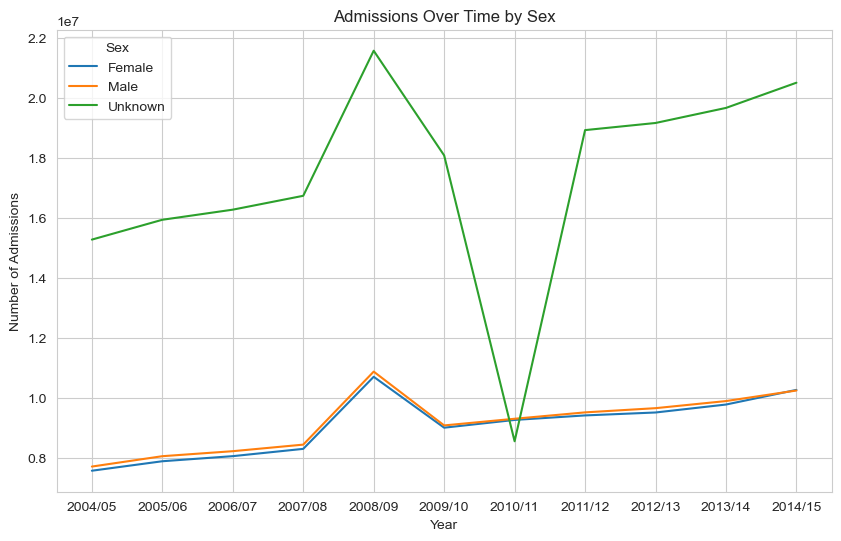

In [371]:
#Admissions by Sex
sex_trend = admissions.groupby(['Year', 'Sex'])['Value'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=sex_trend, x='Year', y='Value', hue='Sex')
plt.title('Admissions Over Time by Sex')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()



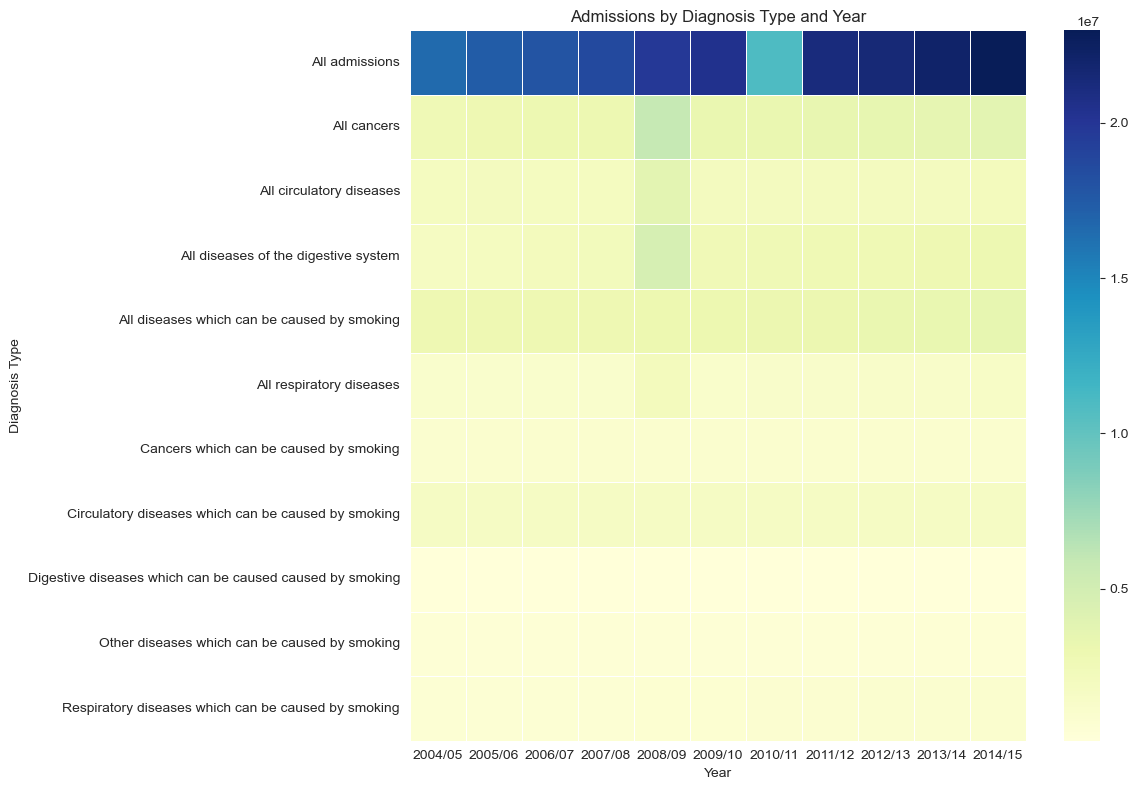

In [372]:
pivot_df = admissions.pivot_table(values='Value', index='Diagnosis Type', columns='Year', aggfunc='sum').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', linewidths=0.5)
plt.title('Admissions by Diagnosis Type and Year')
plt.xlabel('Year')
plt.ylabel('Diagnosis Type')
plt.tight_layout()
plt.show()


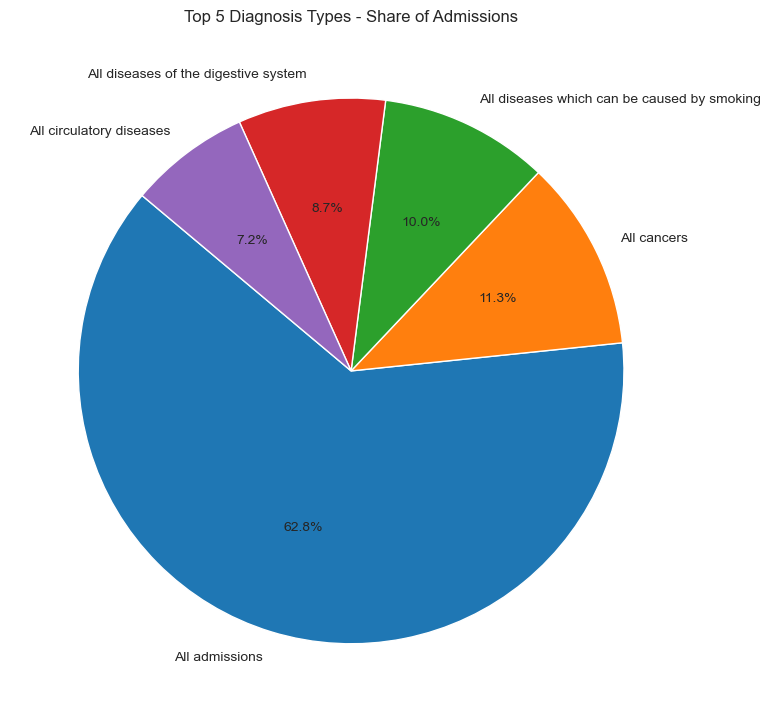

In [373]:
top_diag = admissions.groupby('Diagnosis Type')['Value'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_diag.values, labels=top_diag.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Diagnosis Types - Share of Admissions')
plt.tight_layout()
plt.show()


## Summary: Tobacco Use and Hospital Admissions (2004–2015) 
This project analyzes hospital admissions data in the UK from 2004 to 2015, focusing on diagnoses potentially linked to tobacco use. Using Python-based data analysis and visualization tools, the study uncovers critical trends and insights relevant to public health and tobacco-related morbidity.

# Key Insights:
Rising Admissions: Overall hospital admissions showed a steady increase over the years, indicating growing healthcare demand.

* Smoking-Linked Diseases: Diagnosis categories such as respiratory diseases, circulatory diseases, and cancers were among the top contributors to hospitalizations — many of which are directly or indirectly linked to smoking.

* Gender Disparity: Male patients accounted for a significantly higher number of admissions in smoking-related disease categories compared to females.

* Top Diagnoses:
 All respiratory diseases
 All circulatory diseases
 Smoking-related cancers (e.g., lung, oral, bladder)
Temporal Patterns: The heatmap and line charts reveal sharp increases in specific disease categories around 2008–2012, possibly linked to policy or behavioral changes.

# Techniques Used:
* Data wrangling using pandas
* Trend and category analysis via seaborn and matplotlib
* Heatmaps, line charts, and pie plots to visualize distributions and patterns
* Grouping by year, sex, and diagnosis type for comparative analysis

# Conclusion:
This analysis highlights the significant healthcare burden posed by tobacco use, with respiratory and circulatory diseases driving a large portion of admissions. It underscores the need for targeted public health policies, especially around prevention and smoking cessation.